# Data prep and EDA

**The aim of this document** - is to prepare the data for modeling and uncover patterns essential for building effective classification models.

**Steps**
1. **Create Target Variable:** Define the target variable focusing on identifying "poor" credit customers.
2. **Handle Missing Values and Outliers:** Address missing values and detect/manage outliers.
3. **Familiarize with the Data:** Explore data distributions and analyze correlations between columns.
4. **Feature Engineering and Dummy Variables:** Create new features and convert categorical variables into dummy variables.

*Please note that data preparation is an iterative process. It requires multiple cycles of exploration, cleaning, and transformation to refine the dataset for optimal modeling.*

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

### Import Data and Create Target Column

In [7]:
df = pd.read_csv(r"dataset.csv").drop(["ID", "Customer_ID", "Name"], axis=1)
df["Is_Poor_Credit_Score"] = np.where(df["Credit_Score"] == "Poor", 1, 0)

df.head(10)

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Is_Poor_Credit_Score
0,1,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good,0
1,2,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good,0
2,3,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good,0
3,4,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good,0
4,5,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good,0
5,6,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good,0
6,7,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good,0
7,8,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard,0
8,1,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,...,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard,0
9,2,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,...,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good,0


### Identify Missing Values

In [8]:
df.isnull().sum().to_frame("num_missing_values")

,num_missing_values
Month,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0


### Numeric Columns Distribution
Boxplot is a good idea to identify outliers in these distributions.

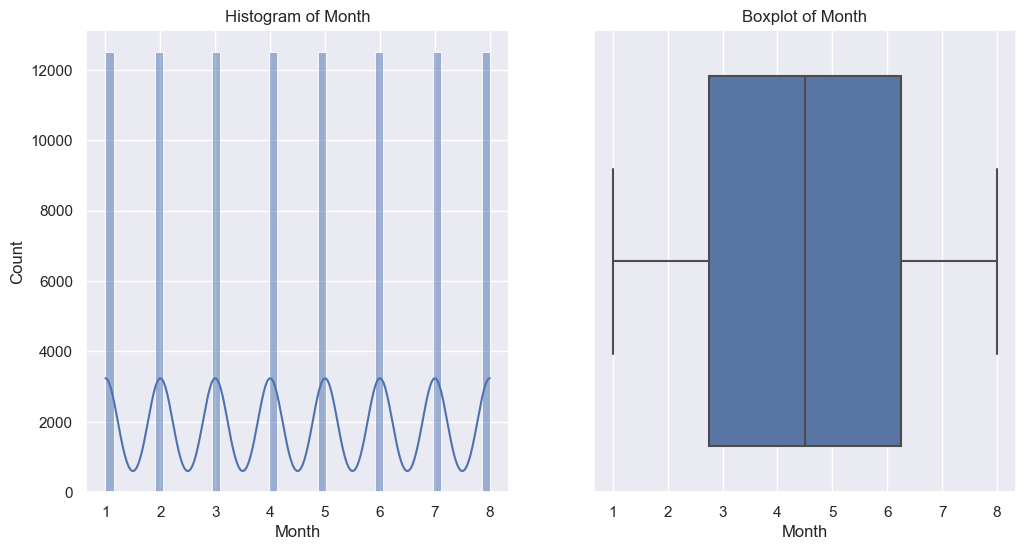

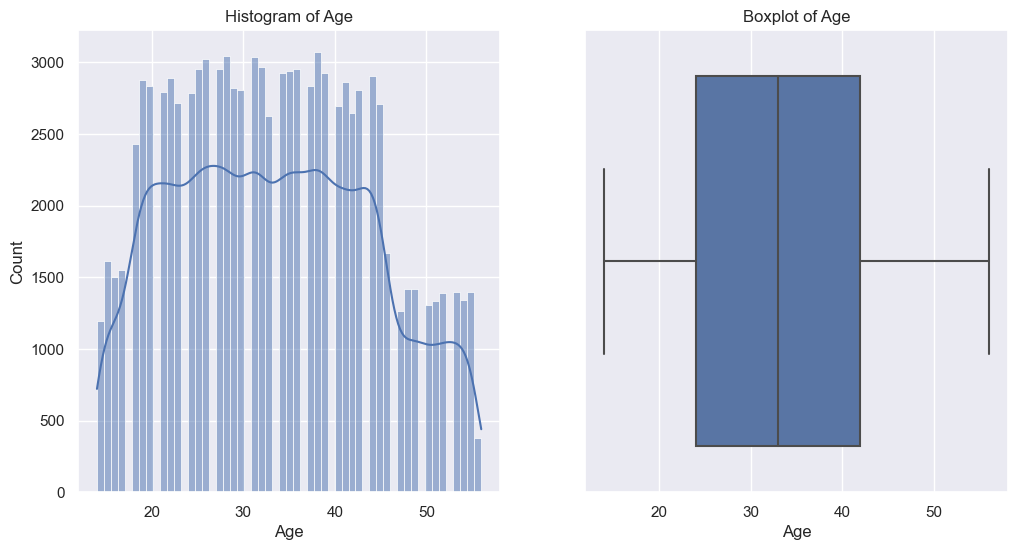

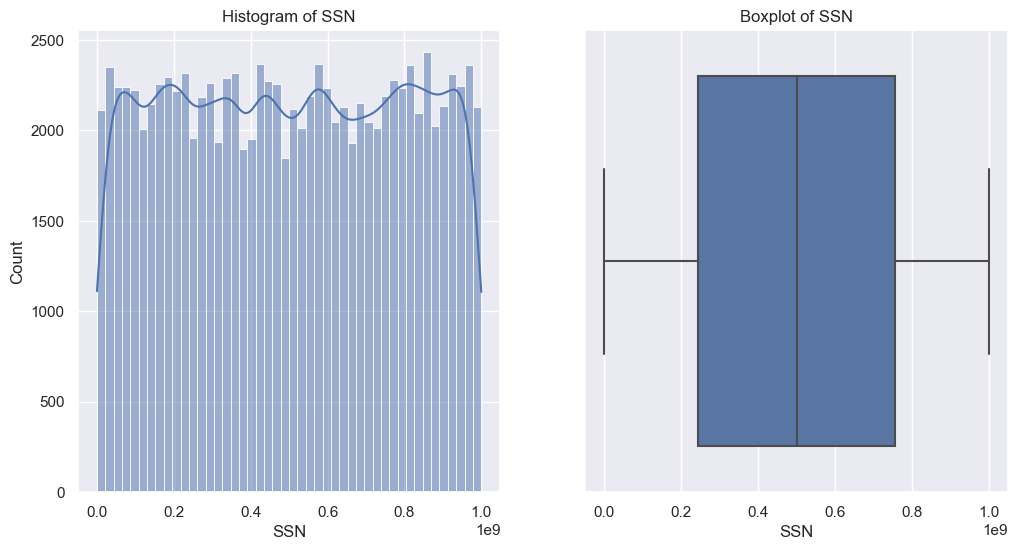

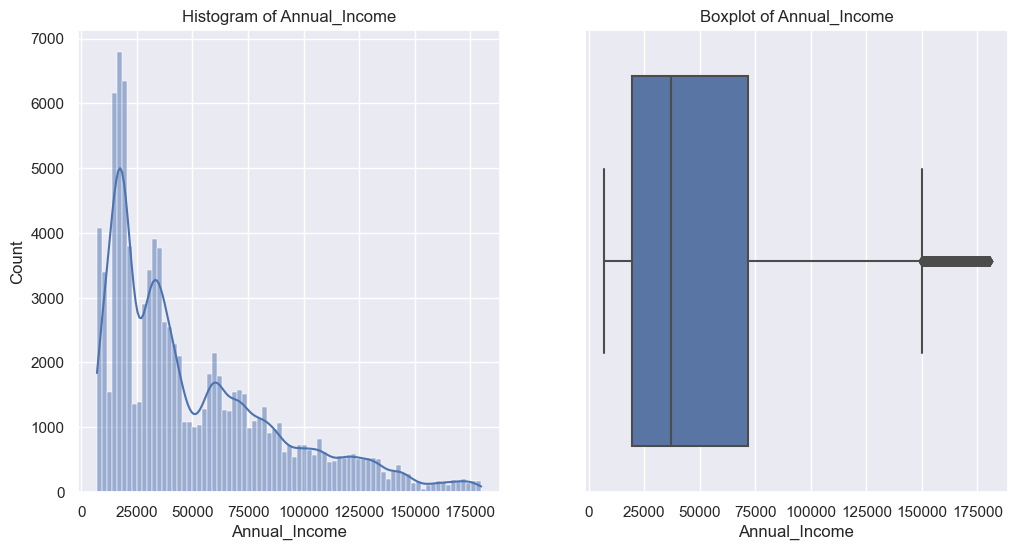

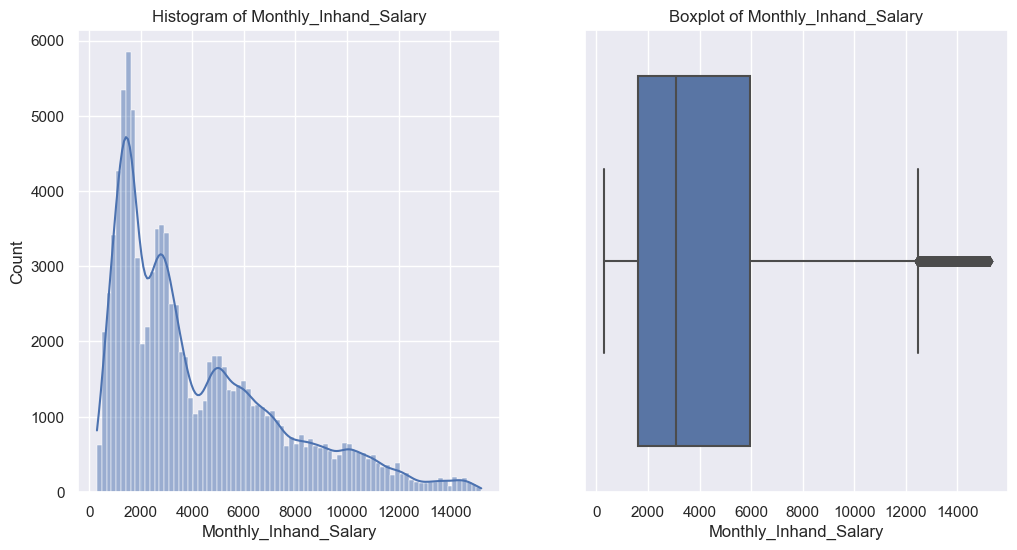

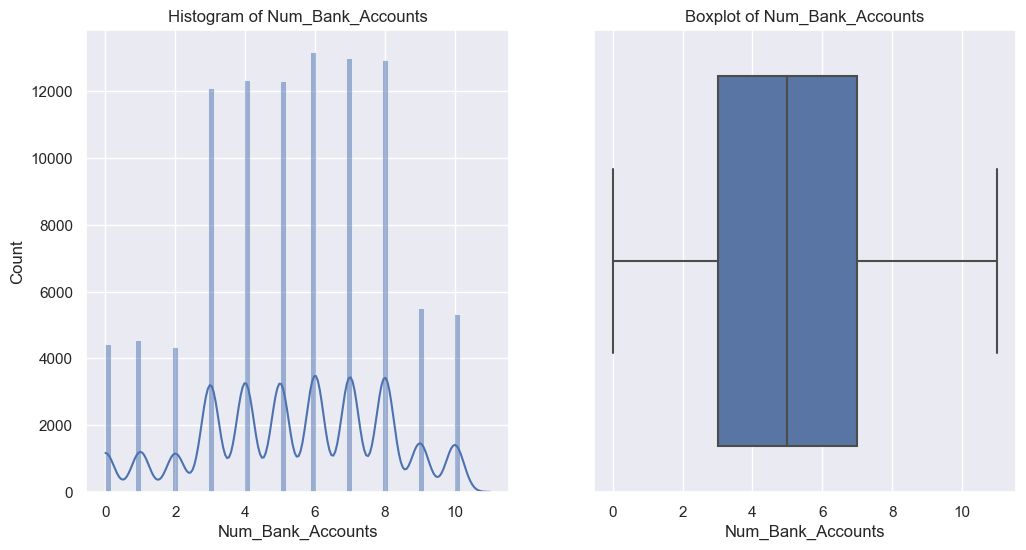

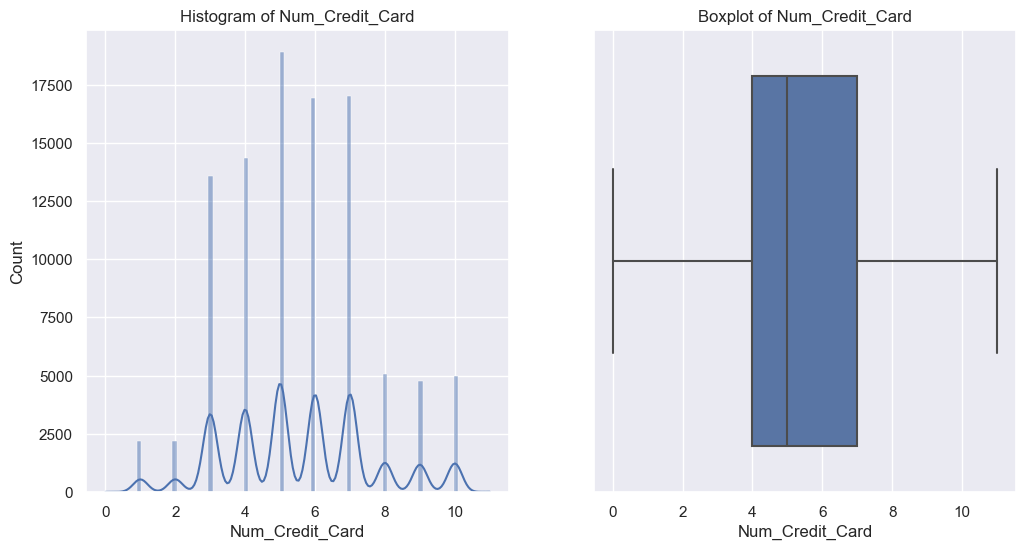

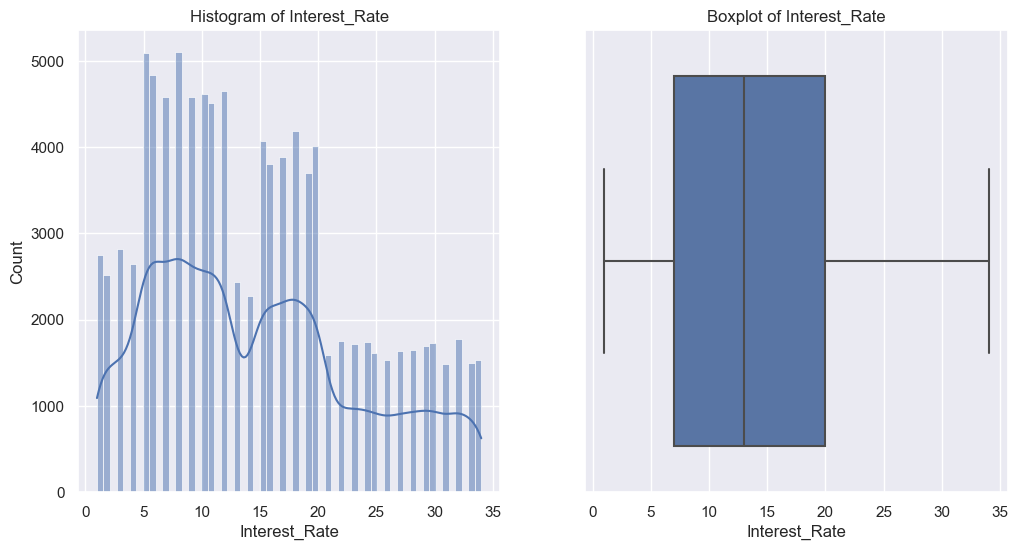

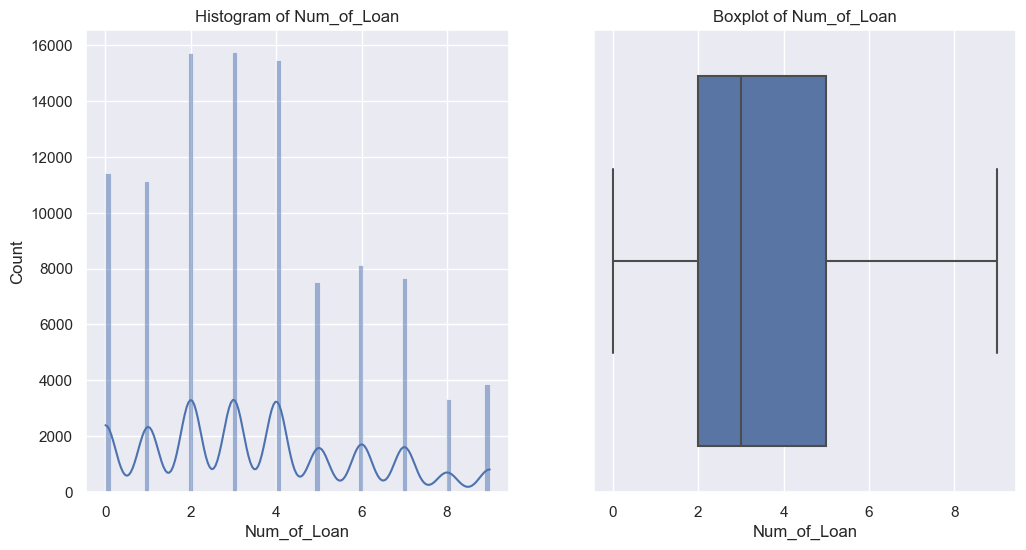

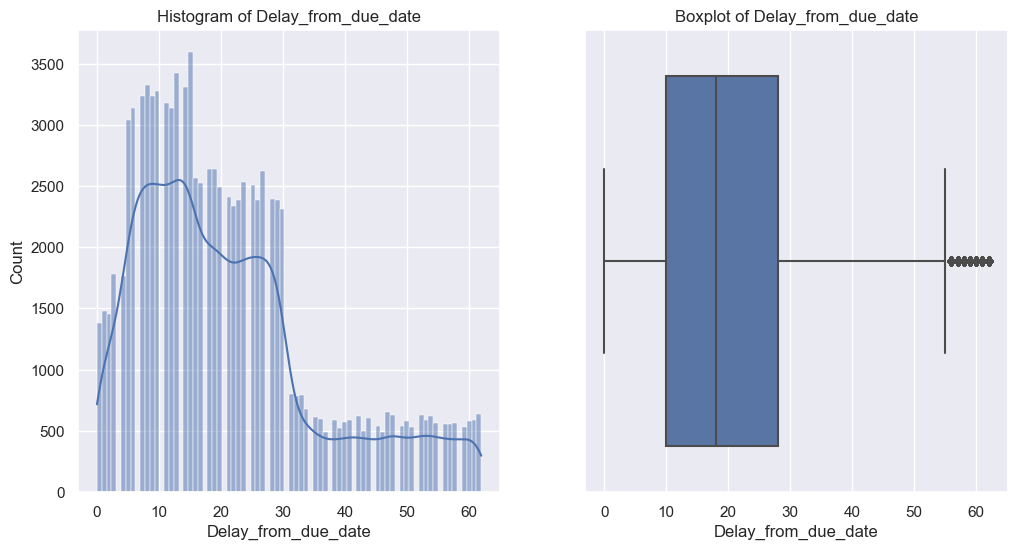

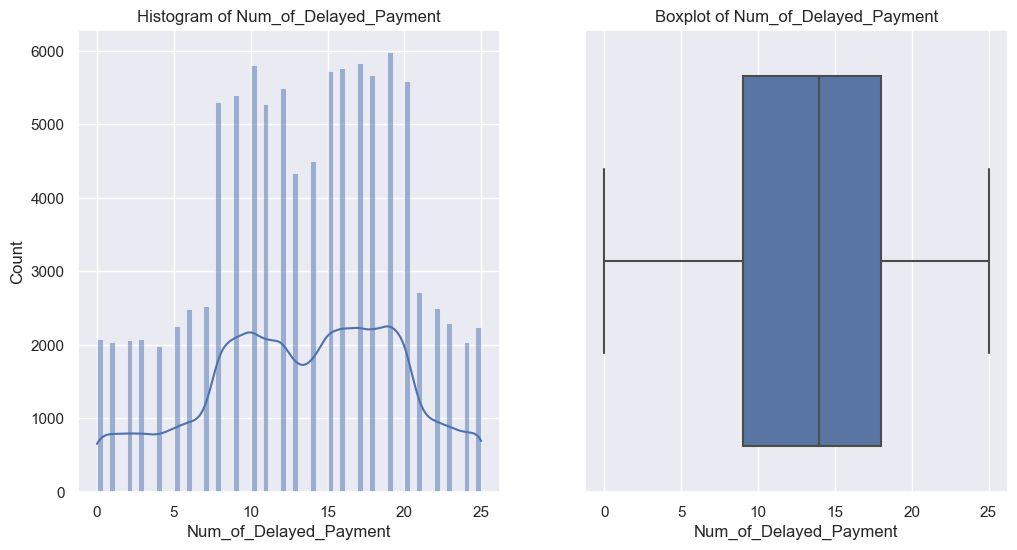

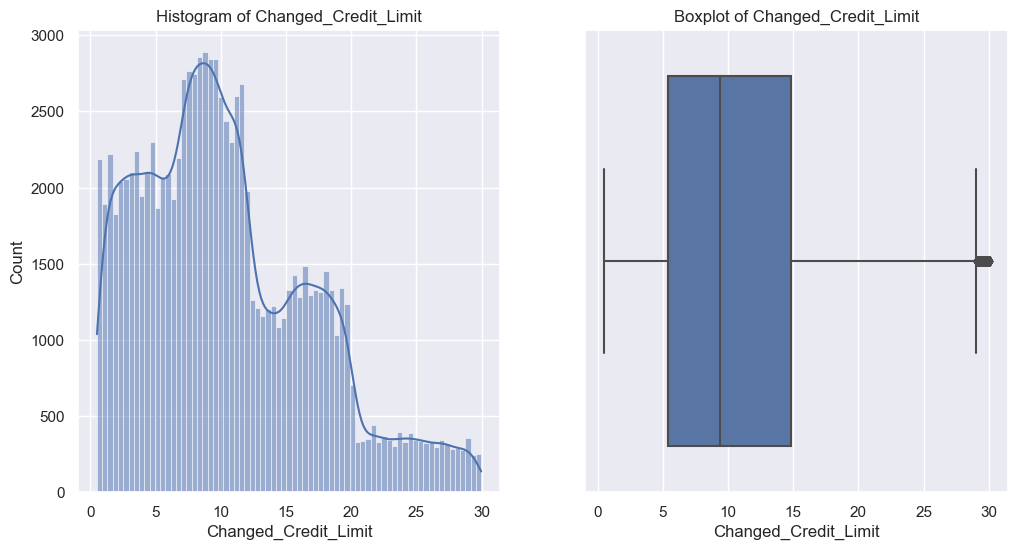

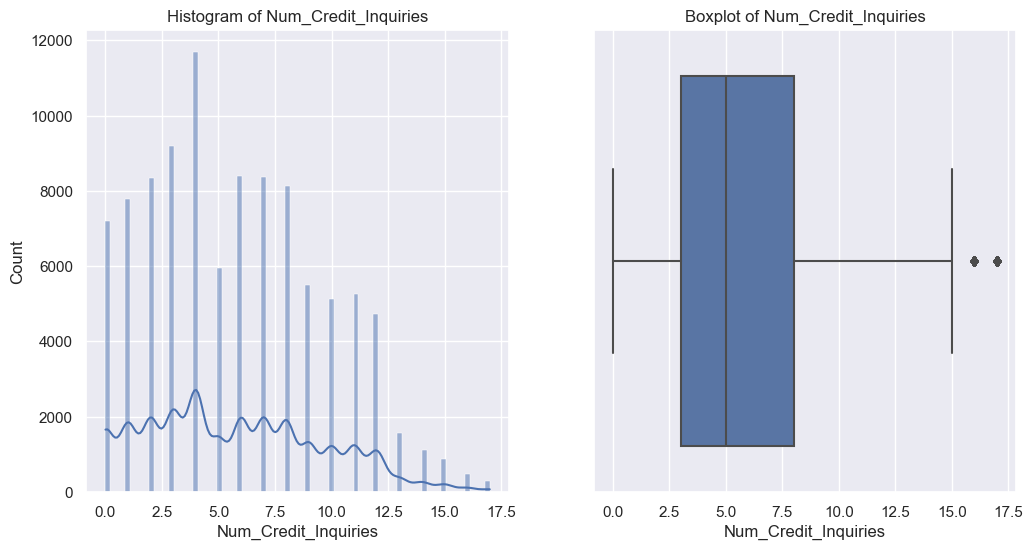

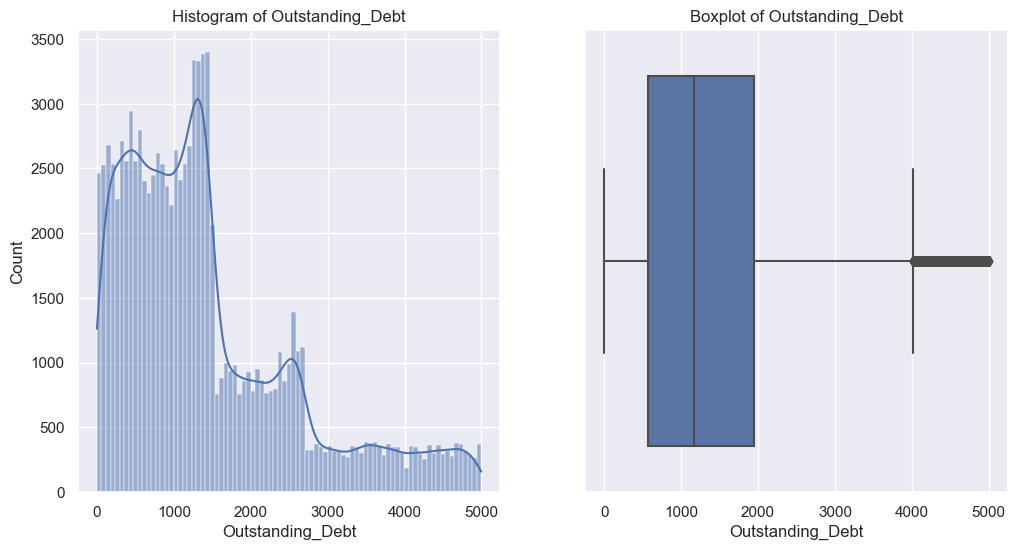

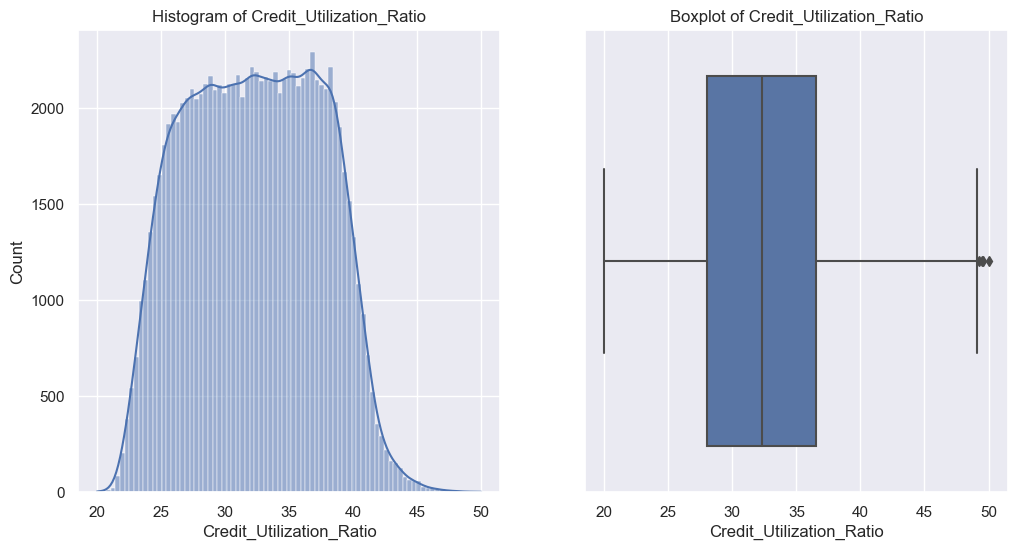

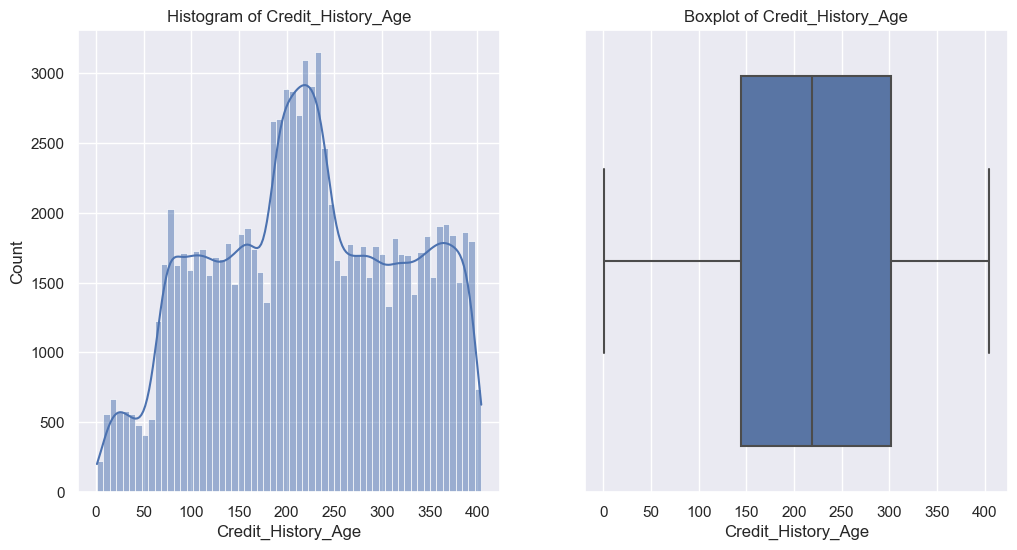

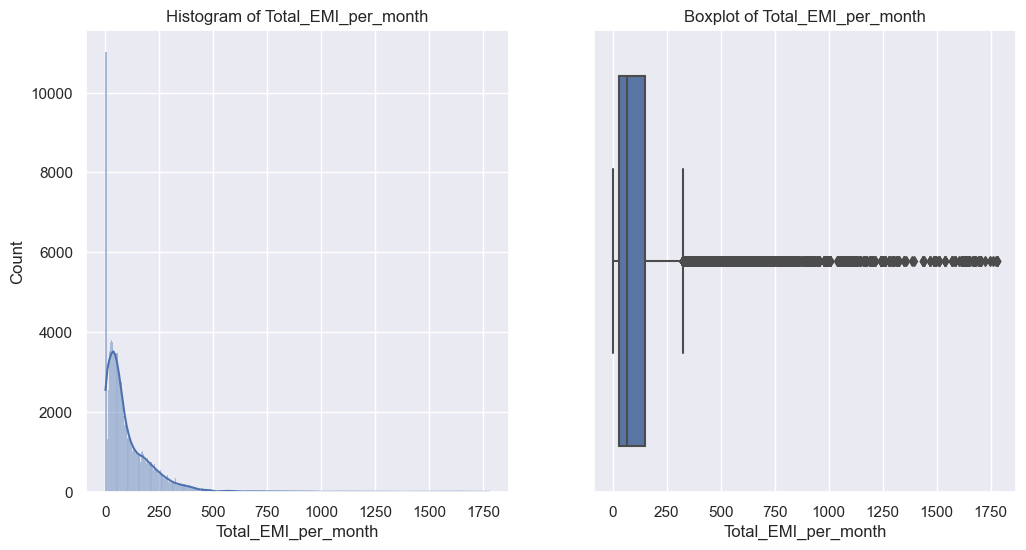

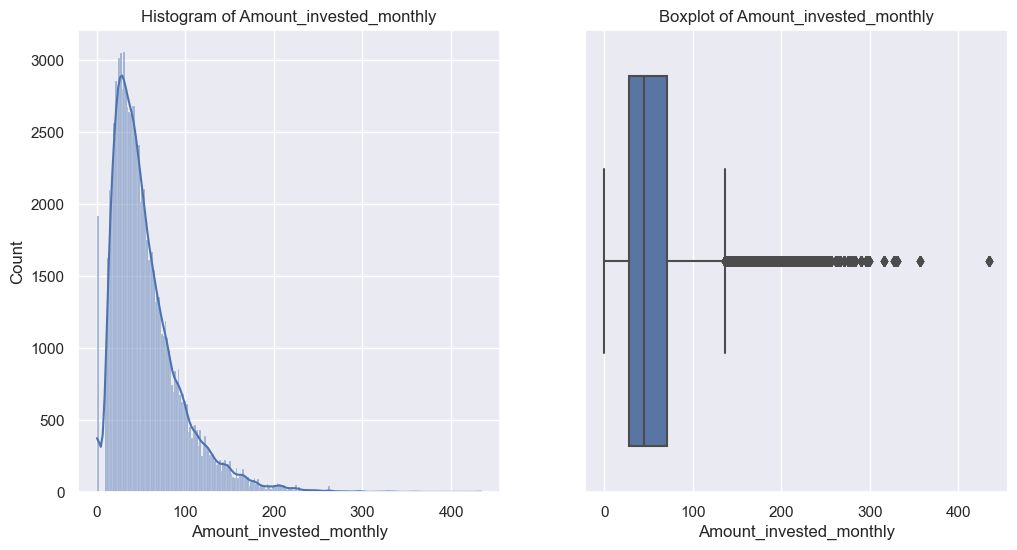

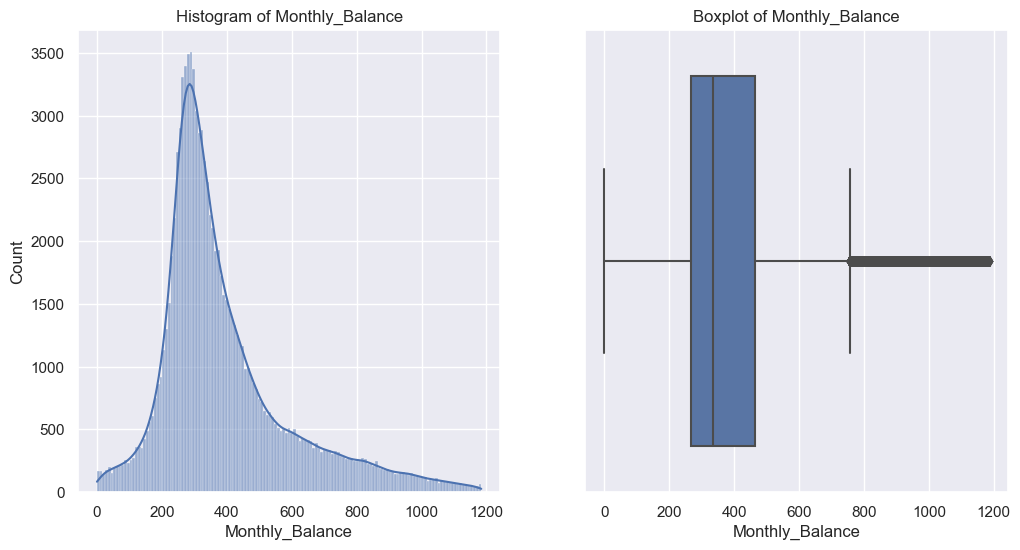

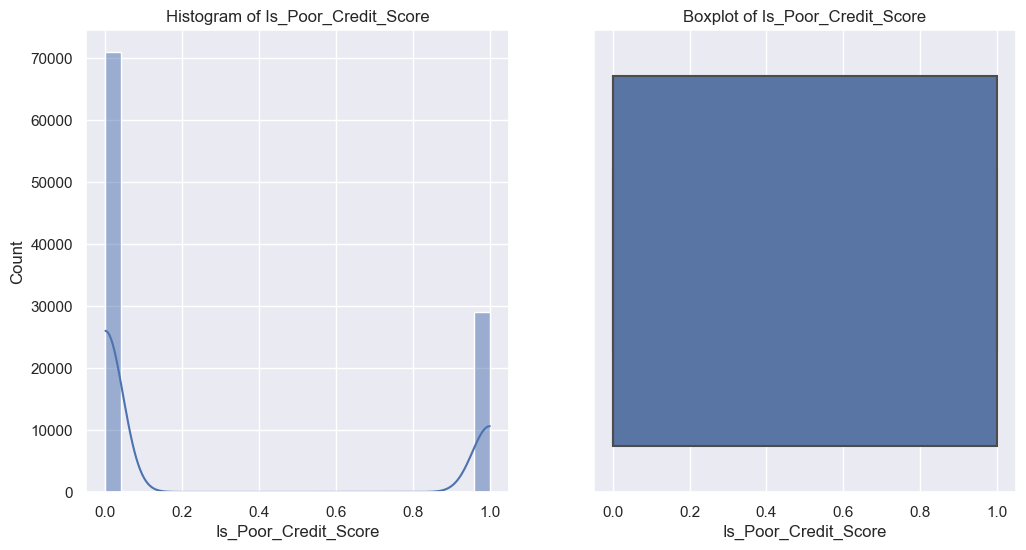

In [9]:
for col in df.select_dtypes("number").columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.histplot(df[col], ax=axes[0], kde=True)
    sns.boxplot(x=df[col], ax=axes[1])
    
    axes[0].set_title(f"Histogram of {col}")
    axes[1].set_title(f"Boxplot of {col}")
    plt.show()

### Categorical Columns Distribution
Consider reducing or combining some values into groups

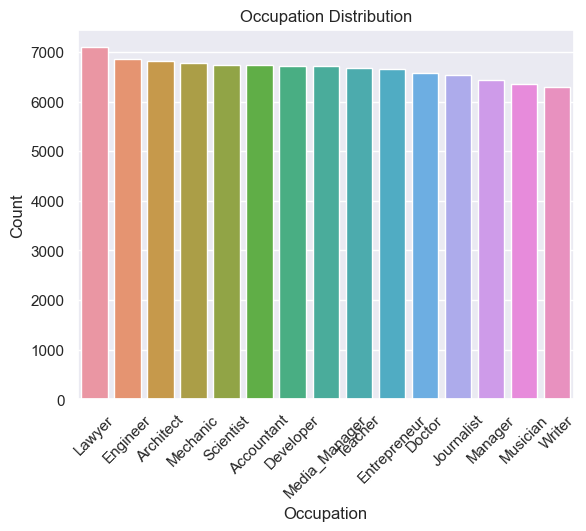

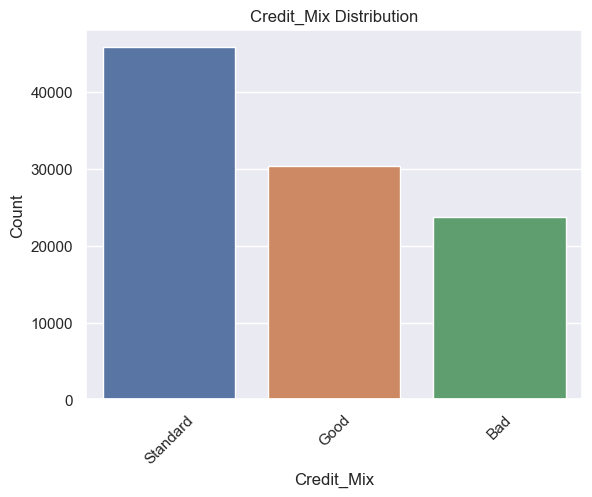

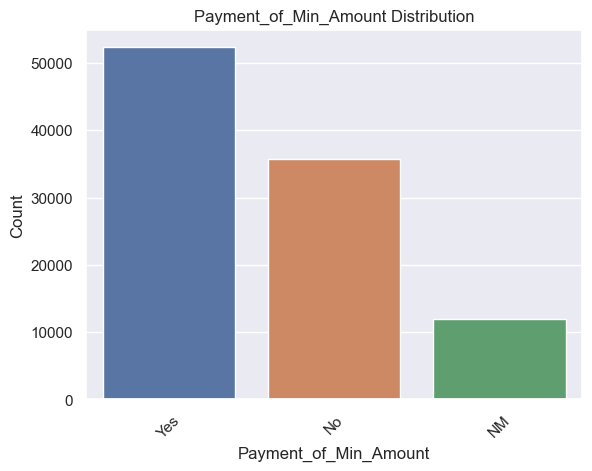

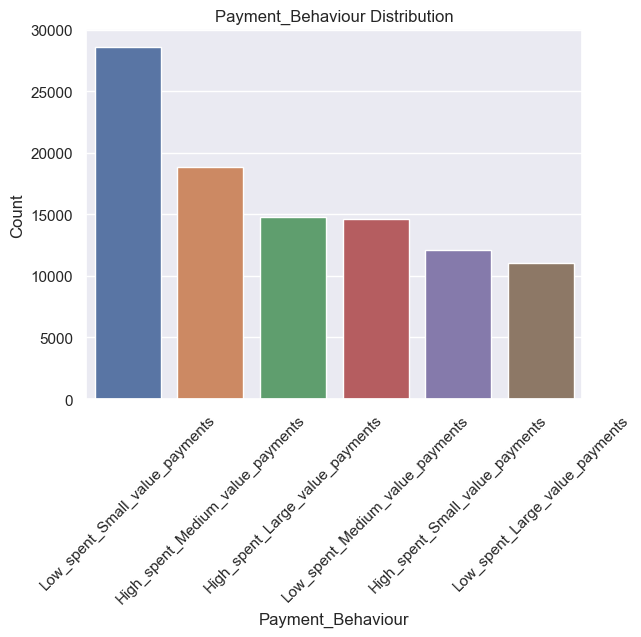

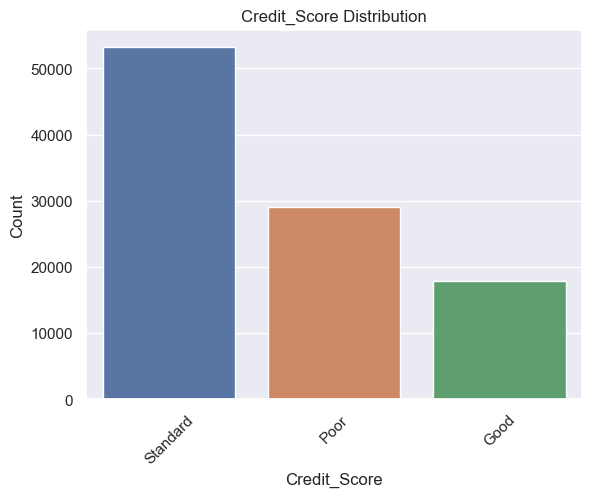

In [10]:
for col in df.select_dtypes("object").drop("Type_of_Loan", axis=1).columns:
    data = df[col].value_counts().reset_index()
    sns.barplot(data=data, x=col, y="count") 
    
    plt.title(f"{col} Distribution")
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    
    plt.xticks(rotation=45)
    plt.show()

### Feature to Target Correlation Bar Plot

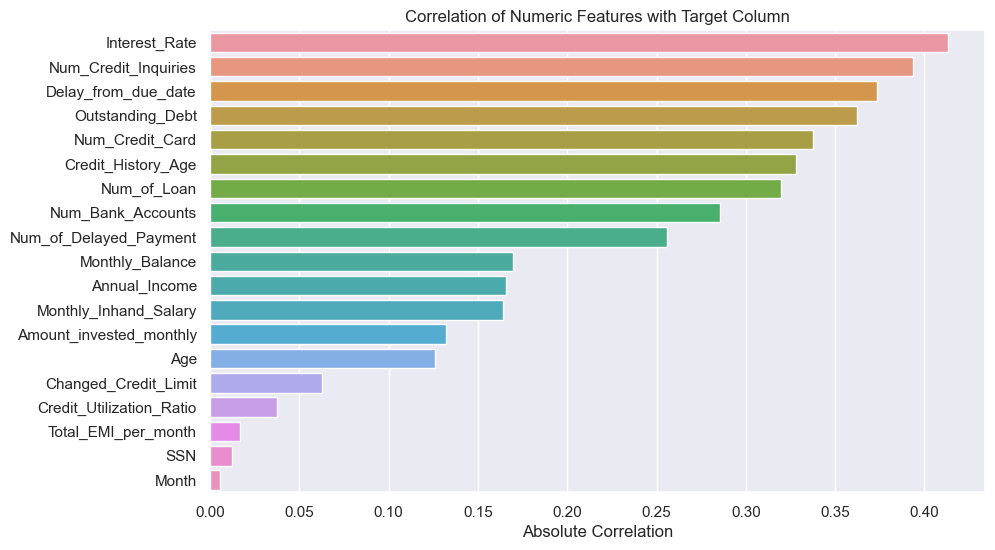

In [11]:
target_correlation = df.corr(numeric_only=True)["Is_Poor_Credit_Score"].abs().reset_index()[:-1].sort_values("Is_Poor_Credit_Score", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=target_correlation, x="Is_Poor_Credit_Score", y="index")
plt.title("Correlation of Numeric Features with Target Column")
plt.xlabel("Absolute Correlation")
plt.ylabel("")
plt.show()

### Feature to Feature Correlation Matrix
There are only two columns with high correlation.

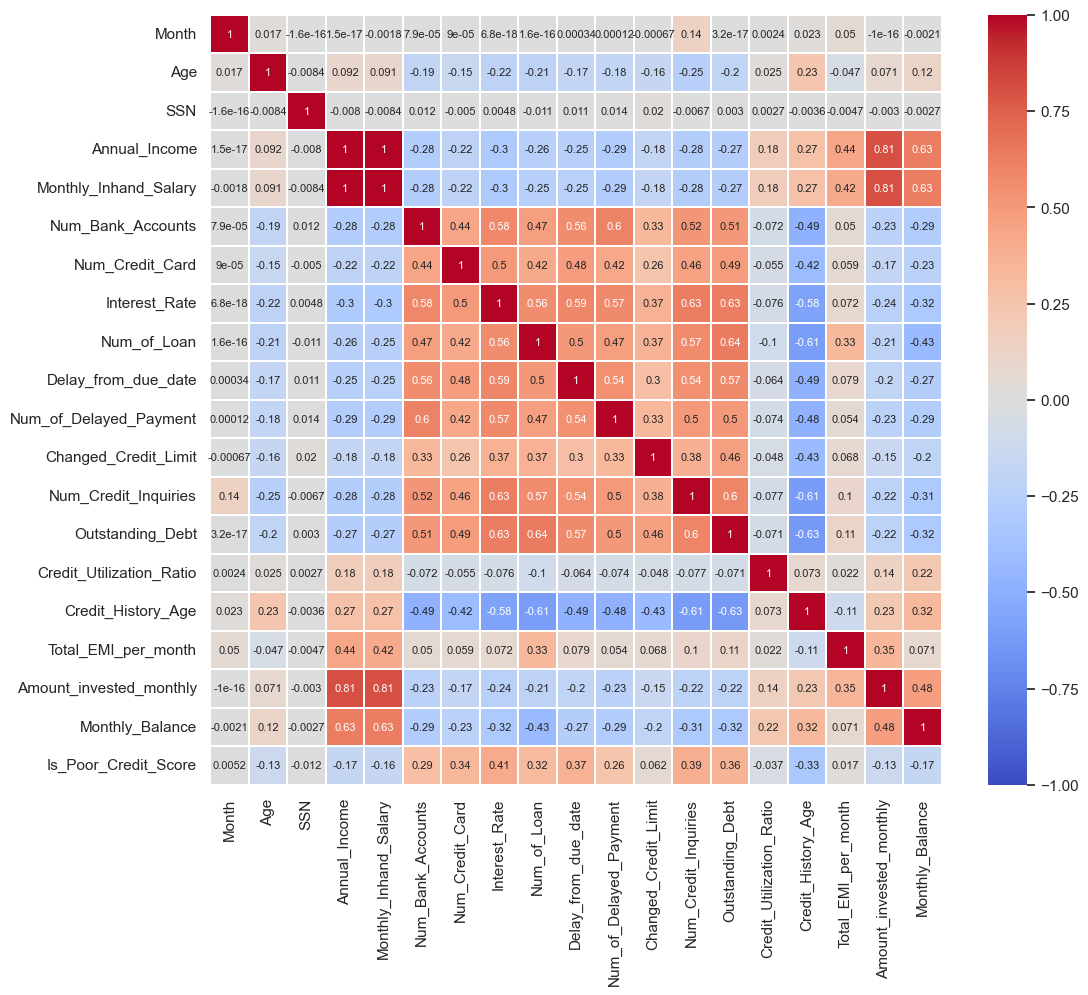

In [12]:
data = df.corr(numeric_only=True).drop("Is_Poor_Credit_Score", axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(data, vmin=-1, vmax=1, cmap="coolwarm", annot=True, linewidths=0.1, annot_kws={"size": 8}, square=True)
plt.show()

### Feature Engineering

In [13]:
# age bins
bin_edges = [0, 20, 30, 40, 50, 60, float("inf")]
bin_labels = ["<20", "20-30", "30-40", "40-50", "50-60", "60+"]
df["Age_bin"] = pd.cut(df["Age"], bins=bin_edges, labels=bin_labels)

# payment behaviour splitting
df["Spent_Behaviour"] = df["Payment_Behaviour"].str.split("_").str[0]
df["Value_Payments"] = df["Payment_Behaviour"].str.split("_").str[2]

# types of loans - new binary columns
categories = df["Type_of_Loan"].str.split(",").explode().reset_index().drop_duplicates()
loans_categories = pd.get_dummies(categories, columns=['Type_of_Loan'], dtype=int).groupby("index").sum().reset_index().drop("index", axis=1)
df = pd.concat([df, loans_categories], axis=1)

# drop unnecessary columns
df.drop(["Credit_Score", "Payment_Behaviour", "Type_of_Loan"], axis=1, inplace=True)
df.head(10)

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Type_of_Loan_No Data,Type_of_Loan_auto loan,Type_of_Loan_credit-builder loan,Type_of_Loan_debt consolidation loan,Type_of_Loan_home equity loan,Type_of_Loan_mortgage loan,Type_of_Loan_not specified,Type_of_Loan_payday loan,Type_of_Loan_personal loan,Type_of_Loan_student loan
0,1,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,0,1,1,0,1,0,0,0,1,0
1,2,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,0,1,1,0,1,0,0,0,1,0
2,3,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,0,1,1,0,1,0,0,0,1,0
3,4,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,0,1,1,0,1,0,0,0,1,0
4,5,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,0,1,1,0,1,0,0,0,1,0
5,6,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,0,1,1,0,1,0,0,0,1,0
6,7,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,0,1,1,0,1,0,0,0,1,0
7,8,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,0,1,1,0,1,0,0,0,1,0
8,1,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,...,0,0,1,0,0,0,0,0,0,0
9,2,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,...,0,0,1,0,0,0,0,0,0,0


### Dummy Variables

In [14]:
cols = list(df.select_dtypes(["object", "category"]).columns)
df = pd.get_dummies(df, columns=cols, drop_first=True, dtype=int)

df.head(10)

,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Age_bin_20-30,Age_bin_30-40,Age_bin_40-50,Age_bin_50-60,Age_bin_60+,Spent_Behaviour_Low,Value_Payments_Medium,Value_Payments_Small
0,1,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,0,1,0,0,0,0,0,0,1
1,2,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,0
2,3,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,1,0
3,4,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1,0,1,0,0,0,0,1,0,1
4,5,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,1,0,1,0,0,0,0,0,1,0
5,6,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,...,1,0,1,0,0,0,0,0,1,0
6,7,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,1
7,8,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,0,1,0,0,0,0,0,1,0
8,1,28.0,4075839.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,0,1,0,0,0,0,1,0,1
9,2,28.0,4075839.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,...,1,0,1,0,0,0,0,0,0,0


### Export Data for Modeling

In [15]:
df.to_csv("prepared_data.csv", index=False)